In [1]:
import numpy as np
import folium
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from folium.plugins import HeatMap
from datetime import datetime
from branca.colormap import StepColormap



In [2]:
# Path to your CSV file

# Read the CSV file
df = pd.read_csv("C:\\Users\\chimi\\Desktop\\Python Data Science Projects\\airbnb-rentalprice\\task3-eda\\athens_rental.csv")

# Display the first few rows of the dataframe
print(df.head())




   listing_id                                               name  host_id  \
0       10595  Condo in Athens · ★4.83 · 3 bedrooms · 5 beds ...    37177   
1       10595  Condo in Athens · ★4.83 · 3 bedrooms · 5 beds ...    37177   
2       10595  Condo in Athens · ★4.83 · 3 bedrooms · 5 beds ...    37177   
3       10595  Condo in Athens · ★4.83 · 3 bedrooms · 5 beds ...    37177   
4       10595  Condo in Athens · ★4.83 · 3 bedrooms · 5 beds ...    37177   

  neighbourhood  latitude  longitude        room_type  price  minimum_nights  \
0   ΑΜΠΕΛΟΚΗΠΟΙ  37.98863   23.76527  Entire home/apt    200               1   
1   ΑΜΠΕΛΟΚΗΠΟΙ  37.98863   23.76527  Entire home/apt    200               1   
2   ΑΜΠΕΛΟΚΗΠΟΙ  37.98863   23.76527  Entire home/apt    200               1   
3   ΑΜΠΕΛΟΚΗΠΟΙ  37.98863   23.76527  Entire home/apt    200               1   
4   ΑΜΠΕΛΟΚΗΠΟΙ  37.98863   23.76527  Entire home/apt    200               1   

   number_of_reviews  ... number_of_reviews_ltm  reviewe

In [3]:
df.shape

(461598, 24)

In [4]:
df.head(5)

,listing_id,name,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,...,number_of_reviews_ltm,reviewer_id,date,comments,property_type,city,rating,bedrooms,beds,baths
0,10595,Condo in Athens · ★4.83 · 3 bedrooms · 5 beds ...,37177,ΑΜΠΕΛΟΚΗΠΟΙ,37.98863,23.76527,Entire home/apt,200,1,41,...,8,189305.0,2011-05-20,the apartment was wonderful fully equiped beau...,Condo,Athens,4.83,3.0,5.0,2.0
1,10595,Condo in Athens · ★4.83 · 3 bedrooms · 5 beds ...,37177,ΑΜΠΕΛΟΚΗΠΟΙ,37.98863,23.76527,Entire home/apt,200,1,41,...,8,289831.0,2012-08-15,emmanouil was an excellent host he provided us...,Condo,Athens,4.83,3.0,5.0,2.0
2,10595,Condo in Athens · ★4.83 · 3 bedrooms · 5 beds ...,37177,ΑΜΠΕΛΟΚΗΠΟΙ,37.98863,23.76527,Entire home/apt,200,1,41,...,8,2422327.0,2014-05-04,our stay in emmanouil home was comfortable qui...,Condo,Athens,4.83,3.0,5.0,2.0
3,10595,Condo in Athens · ★4.83 · 3 bedrooms · 5 beds ...,37177,ΑΜΠΕΛΟΚΗΠΟΙ,37.98863,23.76527,Entire home/apt,200,1,41,...,8,2635427.0,2013-05-20,manos is a very good host he is kind and helpf...,Condo,Athens,4.83,3.0,5.0,2.0
4,10595,Condo in Athens · ★4.83 · 3 bedrooms · 5 beds ...,37177,ΑΜΠΕΛΟΚΗΠΟΙ,37.98863,23.76527,Entire home/apt,200,1,41,...,8,5001999.0,2022-07-02,highly recommend this apartment clean bright a...,Condo,Athens,4.83,3.0,5.0,2.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461598 entries, 0 to 461597
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   listing_id                      461598 non-null  int64  
 1   name                            461598 non-null  object 
 2   host_id                         461598 non-null  int64  
 3   neighbourhood                   461598 non-null  object 
 4   latitude                        461598 non-null  float64
 5   longitude                       461598 non-null  float64
 6   room_type                       461598 non-null  object 
 7   price                           461598 non-null  int64  
 8   minimum_nights                  461598 non-null  int64  
 9   number_of_reviews               461598 non-null  int64  
 10  last_review                     461598 non-null  object 
 11  reviews_per_month               461598 non-null  float64
 12  calculated_host_

In [6]:
# Top 5 rows of continuous variables
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365','rating','bedrooms','baths','rating']].head()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,rating,bedrooms,baths,rating
0,200,1,41,0.28,7,139,4.83,3.0,2.0,4.83
1,200,1,41,0.28,7,139,4.83,3.0,2.0,4.83
2,200,1,41,0.28,7,139,4.83,3.0,2.0,4.83
3,200,1,41,0.28,7,139,4.83,3.0,2.0,4.83
4,200,1,41,0.28,7,139,4.83,3.0,2.0,4.83


In [7]:
cont_variables = df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365','rating','bedrooms','baths','rating']].describe()
cont_variables

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,bedrooms,baths
count,461598.000000,461598.000000,461598.000000,461598.000000,461598.000000,461598.000000,421551.000000,457067.000000
mean,102.055336,2.606214,196.066803,3.241388,11.133965,209.429525,1.501472,1.154826
std,174.664370,14.317852,147.100204,1.921011,19.046516,104.266411,0.815676,0.468437
min,10.000000,1.000000,1.000000,0.010000,1.000000,0.000000,1.000000,0.000000
25%,49.000000,1.000000,82.000000,1.750000,1.000000,125.000000,1.000000,1.000000
50%,72.000000,2.000000,166.000000,3.000000,3.000000,241.000000,1.000000,1.000000
75%,113.000000,2.000000,271.000000,4.430000,11.000000,296.000000,2.000000,1.000000
max,8000.000000,500.000000,840.000000,14.700000,110.000000,365.000000,33.000000,12.000000


In [8]:
df[["price", "minimum_nights", "number_of_reviews", "reviews_per_month",
    "calculated_host_listings_count", "availability_365"]].skew()

price                             23.185513
minimum_nights                    24.015507
number_of_reviews                  1.143684
reviews_per_month                  0.761420
calculated_host_listings_count     2.723672
availability_365                  -0.527462
dtype: float64

In [9]:
avg_prices = df.groupby('neighbourhood').agg({
    'latitude': 'mean',  # Taking mean latitude and longitude to represent the neighborhood's location
    'longitude': 'mean',
    'price': 'mean'
}).reset_index()


In [ ]:
# Create a base map centered on Athens with OpenStreetMap tiles for a lighter background
m = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=13, tiles = 'CartoDB Positron')

# Using the 'coolwarm' colormap
cmap = plt.get_cmap('tab10')

# Calculate a normalized value for the price to pick a color
avg_prices['normalized_price'] = (avg_prices['price'] - avg_prices['price'].min()) / (avg_prices['price'].max() - avg_prices['price'].min())

# Assign colors to neighborhoods based on their normalized average price
avg_prices['color'] = avg_prices['normalized_price'].apply(lambda x: mcolors.rgb2hex(cmap(x)))

# Create a StepColormap using the colors and quantiles
color_map = StepColormap(
    colors=[cmap(0), cmap(0.25), cmap(0.5), cmap(0.75), cmap(1)],
    index=avg_prices['price'].quantile([0, 0.25, 0.5, 0.75, 1]).tolist(),
    vmin=avg_prices['price'].min(),
    vmax=avg_prices['price'].max(),
    caption='Average Price'
)

# Adding neighborhood names as pop-ups with color based on average price
for index, row in avg_prices.iterrows():
    popup_text = f"Neighbourhood: {row['neighbourhood']}<br>Average Price: ${row['price']:.2f}"
    folium.CircleMarker(
        location=(row['latitude'], row['longitude']),
        radius=5,
        color=row['color'],
        fill=True,
        fill_color=row['color'],
        fill_opacity=0.7
    ).add_child(folium.Popup(popup_text)).add_to(m)

# Add the color map legend to the map
color_map.add_to(m)

m.save('neighbourhood_pricing_with_coolwarm_legend.html')
m

In [ ]:
# Price Distribution
fig, ax = plt.subplots(figsize=(12, 6))

# Boxplot
df['price'].plot(kind='box', vert=False, ax=ax)

# Formatting
ax.tick_params(axis='x', labelsize=20)
ax.axes.get_yaxis().set_ticks([])
ax.set_xlabel('Price', fontsize=20)
ax.set_title('Box Plot of Price', fontsize=24)

# Save the figure
plt.tight_layout()  # Ensures that all elements of the plot fit into the saved image
plt.savefig('priceBoxPlot.png', bbox_inches='tight', pad_inches=0.1)
plt.show()

In [10]:
# Remove outliers
price = 2000
high_price = df[df['price'] > price]
print(high_price.shape)
high_price

(377, 24)


,listing_id,name,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,...,number_of_reviews_ltm,reviewer_id,date,comments,property_type,city,rating,bedrooms,beds,baths
107085,14757686,Rental unit in Athina · ★4.82 · 2 bedrooms · 1...,72720508,ΠΕΤΡΑΛΩΝΑ,37.968060,23.710600,Private room,5000,500,49,...,0,308441.0,2017-06-02,if youre looking for a great value for money f...,Rental unit,Athina,4.82,2.0,1.0,1.0
107086,14757686,Rental unit in Athina · ★4.82 · 2 bedrooms · 1...,72720508,ΠΕΤΡΑΛΩΝΑ,37.968060,23.710600,Private room,5000,500,49,...,0,363361.0,2017-07-16,lovely flat in great location minutes from the...,Rental unit,Athina,4.82,2.0,1.0,1.0
107087,14757686,Rental unit in Athina · ★4.82 · 2 bedrooms · 1...,72720508,ΠΕΤΡΑΛΩΝΑ,37.968060,23.710600,Private room,5000,500,49,...,0,1849382.0,2018-09-27,this room is for you if br you value staying i...,Rental unit,Athina,4.82,2.0,1.0,1.0
107088,14757686,Rental unit in Athina · ★4.82 · 2 bedrooms · 1...,72720508,ΠΕΤΡΑΛΩΝΑ,37.968060,23.710600,Private room,5000,500,49,...,0,1978613.0,2018-08-02,the place is amazing super comfortable big goo...,Rental unit,Athina,4.82,2.0,1.0,1.0
107089,14757686,Rental unit in Athina · ★4.82 · 2 bedrooms · 1...,72720508,ΠΕΤΡΑΛΩΝΑ,37.968060,23.710600,Private room,5000,500,49,...,0,2075238.0,2018-06-02,right next to the metro the place is stylish a...,Rental unit,Athina,4.82,2.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447988,668141693521463785,Condo in Athina · ★4.78 · 1 bedroom · 2 beds ·...,77381961,ΠΑΓΚΡΑΤΙ,37.966860,23.746876,Entire home/apt,6000,5,9,...,9,253632843.0,2022-09-12,15,Condo,Athina,4.78,1.0,2.0,1.0
447989,668141693521463785,Condo in Athina · ★4.78 · 1 bedroom · 2 beds ·...,77381961,ΠΑΓΚΡΑΤΙ,37.966860,23.746876,Entire home/apt,6000,5,9,...,9,268136327.0,2022-11-20,excellent s jour,Condo,Athina,4.78,1.0,2.0,1.0
447990,668141693521463785,Condo in Athina · ★4.78 · 1 bedroom · 2 beds ·...,77381961,ΠΑΓΚΡΑΤΙ,37.966860,23.746876,Entire home/apt,6000,5,9,...,9,478439771.0,2022-12-01,super good spot,Condo,Athina,4.78,1.0,2.0,1.0
447991,668141693521463785,Condo in Athina · ★4.78 · 1 bedroom · 2 beds ·...,77381961,ΠΑΓΚΡΑΤΙ,37.966860,23.746876,Entire home/apt,6000,5,9,...,9,482733899.0,2022-11-15,cozy atmospheric and clean apartment it has al...,Condo,Athina,4.78,1.0,2.0,1.0


In [11]:
# Make a copy
df_copy = df.copy()

In [12]:
# Filter in price less than 2000
df = df[df['price'] < 2000]

In [ ]:

# Create figure
fig = go.Figure()

# Add horizontal box plot
fig.add_trace(go.Box(x=df['price'], y=['Price'] * len(df), name='Price'))

# Display the plot
fig.show()


In [ ]:

fig = px.box(df, x='room_type', y='price', color='room_type', title='Average price based on room_type in Greece',
             color_discrete_sequence=px.colors.qualitative.Pastel)

# Update the layout and axis labels
fig.update_layout(
    xaxis_title="Room Type",
    yaxis_title="Price",
    boxmode='group'  # to group boxes of the same category together
)

fig.show()


Text(0.5, 1.0, 'Relationship between minimum nights and price')

<Figure size 1200x600 with 0 Axes>

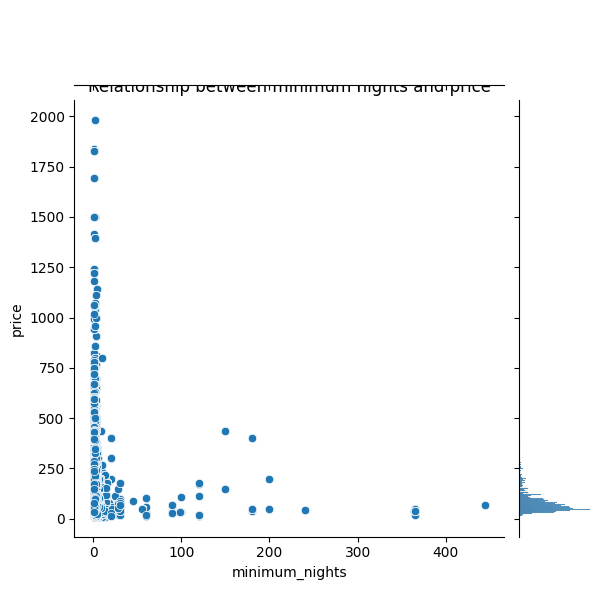

In [13]:
# How does the 'minimum nights' requirement releate to the price? Does more night mean higher price?
plt.figure(figsize=(12,6))
sns.jointplot(x='minimum_nights', y='price',data=df,palette='pastel')
plt.title('Relationship between minimum nights and price')

In [ ]:
# Relationship between target variables and numericals
selected_data  = df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365','rating','bedrooms','baths','rating']]
# Iterate over each column except 'price'
  for col in selected_data.columns:
    if col != 'price':
        fig = px.scatter(selected_data, x=col, y='price', title=f'Price vs. {col}')
        fig.show()

C:\Users\chimi\AppData\Local\Temp\ipykernel_3660\3087767865.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = selected_data.corr()


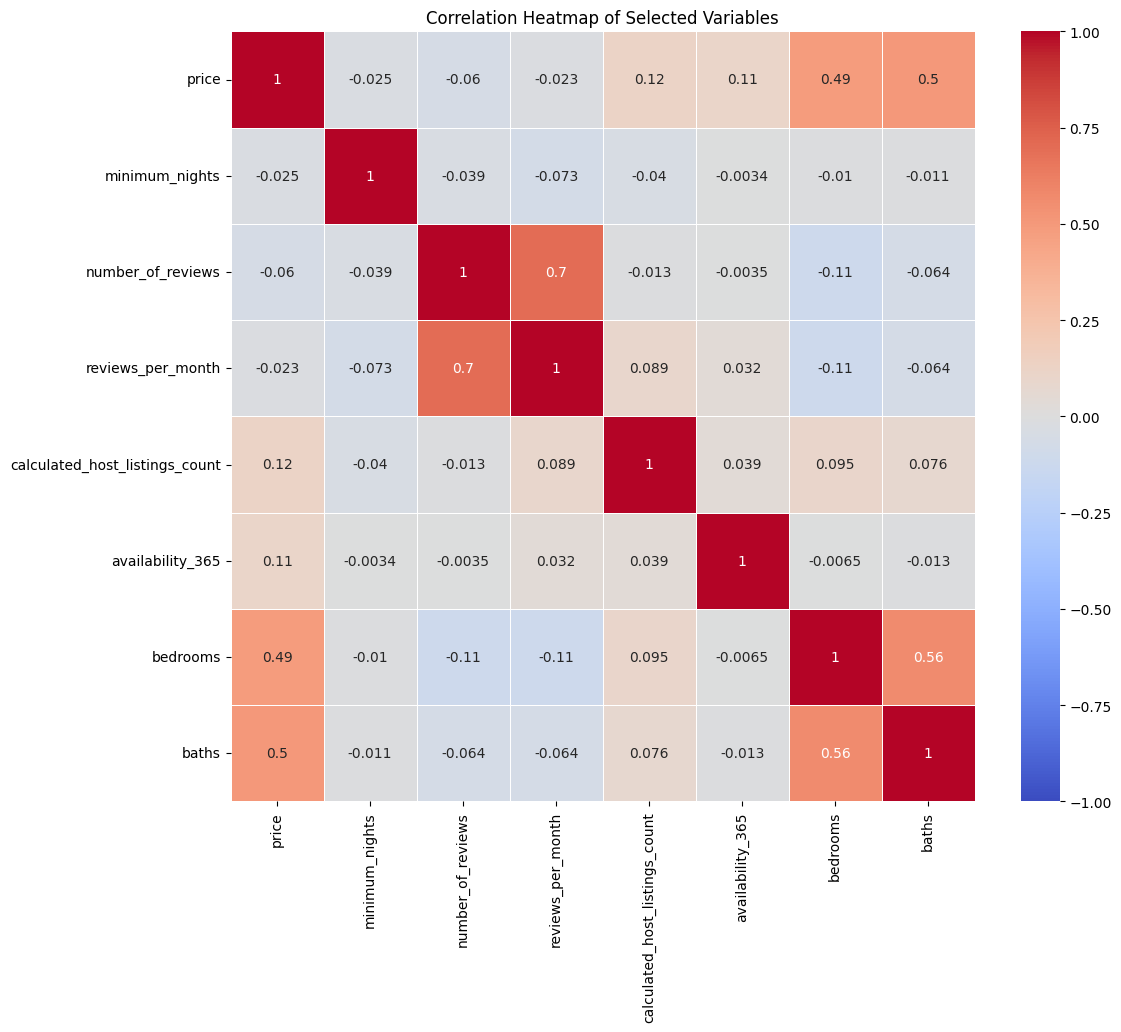

In [15]:
# Calculate the correlation matrix
corr = selected_data.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, linewidths=0.5)
plt.title('Correlation Heatmap of Selected Variables')
plt.show()

In [16]:
df.to_csv('athens_finalrental.csv', index=False)